Testing if the inner product of two states seperated in distance is one

In [1]:
import iDEA as idea
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
x = np.linspace(-30,30,180)
v_int = idea.interactions.softened_interaction(x)

v_ext1 = -2*np.exp(-((x-20)**2)/10) - 2.005*np.exp(-((x+20)**2)/10)
v_ext2 = -2*np.exp(-((x-19.8)**2)/10) - 2.005*np.exp(-((x+19.8)**2)/10)

In [3]:
system1 = idea.system.System(x, v_ext1, v_int, electrons="uu")
system2 = idea.system.System(x, v_ext2, v_int, electrons="uu")


In [4]:
print(system1.count)

2


In [5]:
system1_doublestate = idea.methods.interacting.solve(system1, k=7)
system1_firststate = idea.methods.interacting.solve(system1, k=1)
system1_sixthstate = idea.methods.interacting.solve(system1, k=6)
system2_doublestate = idea.methods.interacting.solve(system2, k=7)

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...


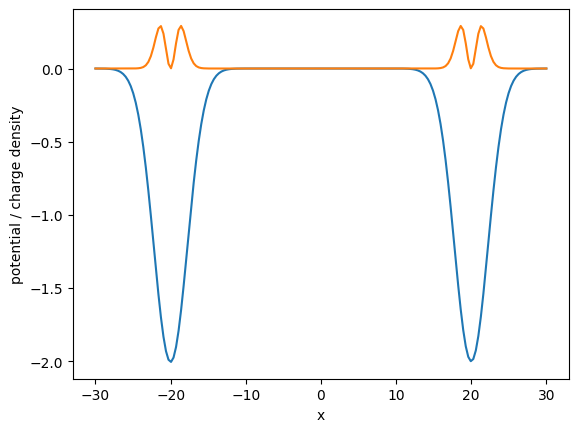

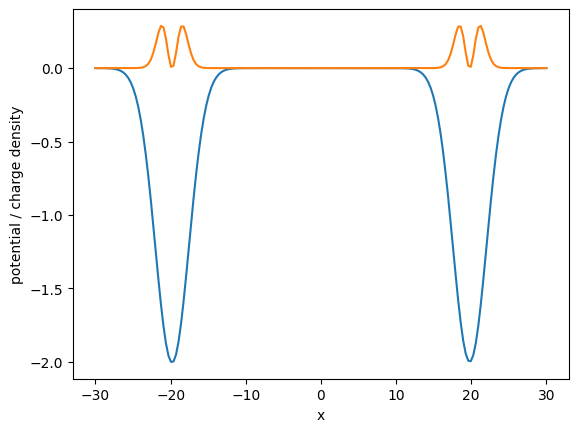

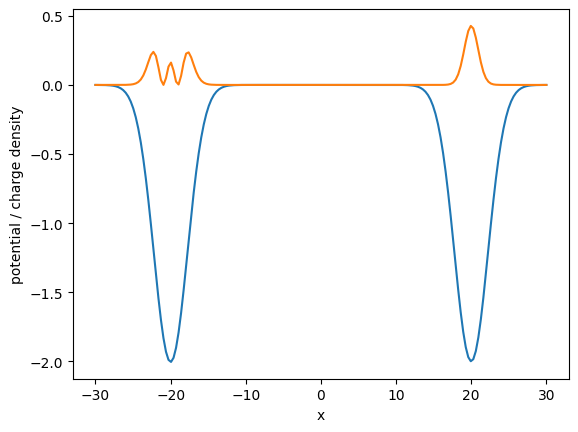

In [6]:
plt.plot(x,v_ext1)
plt.plot(x,idea.observables.density(system1, state=system1_doublestate))
plt.xlabel("x")
plt.ylabel("potential / charge density")
plt.show()
plt.close()

plt.plot(x,v_ext2)
plt.plot(x,idea.observables.density(system2, state=system2_doublestate))
plt.xlabel("x")
plt.ylabel("potential / charge density")
plt.show()
plt.close()

c

In [7]:
#inner = np.tensordot(np.transpose(system2_doublestate.space.real),system2_doublestate.space.real)
#inner = sp.integrate.simpson(sp.integrate.simpson(np.matmul(np.transpose(system2_doublestate.space.real),system2_doublestate.space.real)))
test = np.sum(abs(system2_doublestate.space.real)*abs(system2_doublestate.space.real)) * system2.dx**system2.count
test2 = np.sum(abs(system2_doublestate.space.real)**2)*system2.dx**system2.count
test3 = np.sum(abs(system1_doublestate.space.real)*abs(system2_doublestate.space.real)) * system1.dx**system1.count
test4 = np.sum(abs(system1_sixthstate.space.real)*abs(system1_doublestate.space.real)) * system1.dx**system1.count
print(test)
print(test2)
print(test3)
print(test4)

0.9999999999999998
0.9999999999999998
0.9908851354779787
4.058500648868578e-12


In [20]:
x = np.linspace(-30,30,300)
v_int = idea.interactions.softened_interaction(x)

In [21]:
distancelist = np.concatenate((np.linspace(7,0,71), np.zeros(5)))
v_extb10 = -2*np.exp(-((x-distancelist[10])**2)/10) - 2.005*np.exp(-((x+distancelist[10])**2)/10)
v_extb11 = -2*np.exp(-((x-distancelist[11])**2)/10) - 2.005*np.exp(-((x+distancelist[11])**2)/10)
v_extb12 = -2*np.exp(-((x-distancelist[12])**2)/10) - 2.005*np.exp(-((x+distancelist[12])**2)/10)
b10 = idea.system.System(x,v_extb10, v_int, electrons="uu")
b11 = idea.system.System(x,v_extb11, v_int, electrons="uu")
b12 = idea.system.System(x,v_extb12, v_int, electrons="uu")

In [18]:
b10_7 = idea.methods.interacting.solve(b10, k=7)
b11_7 = idea.methods.interacting.solve(b11, k=7)
b12_7 = idea.methods.interacting.solve(b12, k=7)

iDEA.methods.interacting.solve: solving eigenproblem...


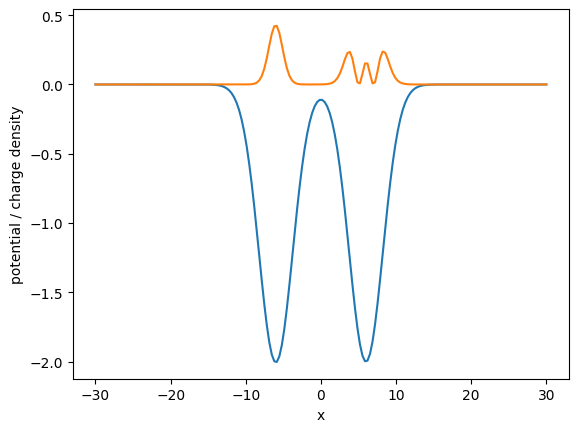

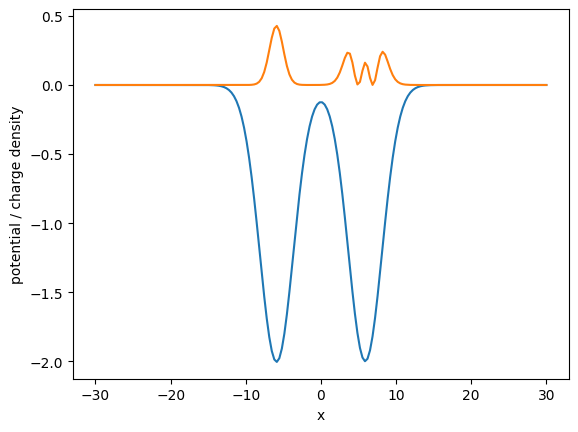

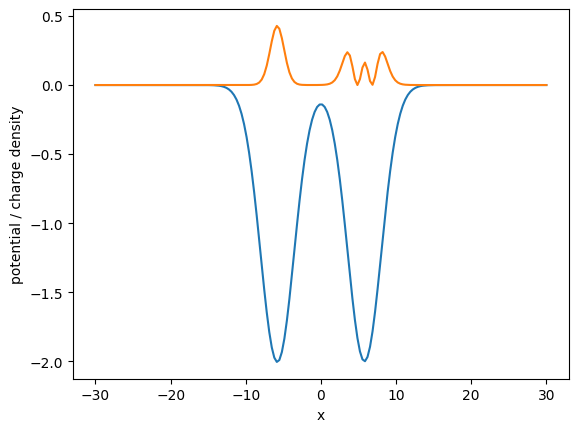

In [19]:
plt.plot(x,v_extb10)
plt.plot(x,idea.observables.density(b10, state=b10_7))
plt.xlabel("x")
plt.ylabel("potential / charge density")
plt.show()
plt.close()

plt.plot(x,v_extb11)
plt.plot(x,idea.observables.density(b11, state=b11_7))
plt.xlabel("x")
plt.ylabel("potential / charge density")
plt.show()
plt.close()

plt.plot(x,v_extb12)
plt.plot(x,idea.observables.density(b12, state=b12_7))
plt.xlabel("x")
plt.ylabel("potential / charge density")
plt.show()
plt.close()


In [15]:
def innerprod(state1,state2):
    return(np.sum(abs(state1.space.real)*abs(state2.space.real))*system.dx**system.count)

In [ ]:
print(innerprod(b11_7,b12_7)